# Zaključno poročilo

skupina PR21AVJMAR : Alen Vidmar, Jaka Maležič, Andraž Rudman

Predstavitev množice podatkov



In [1]:
%matplotlib inline
import matplotlib
%config InlineBackend.figure_format = 'jpg'
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt

matplotlib.__version__

'3.5.1'

## Predstavitev podatkvo

Podatke za projektno nalogo smo našli na spletnem portalu https://covid-19.sledilnik.org/sl/data na temo covid-19 v sloveniji.
Podatke za vreme v sloveniji glede na kraj pa smo dobili na spletnem portalu http://meteo.arso.gov.si/ .

cepljenje.csv:Stevilo cepljenih po dnevih med 26.12.2020 in 5.4.2022. Atributi: datum, stevilo cepljenih, stevilo cepljenih z drugim odmirkom, stevilo cepljenih s tretjim odmerkom

deaths.csv: Stevilo mrtvih po dnevih med 26.12.2020 in 5.4.2022. 

hospitalizacije.csv:V tej podaktkovni zbirki imamo stevilo hospitaliziranih, razdeljno na starostne skupine in nato v skupini cepljeni in necepljeni

okuzbe.csv:V tej zbirki imamo število okuzb glede na skupine, necepljeni potrjeni, polno cepljeni potrjeni, cepljeni z dodatnim odmirkom potrjeni

region-active.csv: V tej podatkovni zbirki imamo število okužb razdeljeno glede na tregije ki se delijo na 


              Populacija
si	SLOVENIJA:	           2108977			
ms	Pomurska:	           114725			
mb	Podravska:	           328469			
sg	Koroška:	               70635			
ce	Savinjska:	           258908			
za	Zasavska:	           57204			
kk	Posavska:	           75928			
nm	Jugovzhodna Slovenija:  145923			
lj	Osrednjeslovenska:  	   555948			
kr	Gorenjska:	           211069	 		
po	Primorsko-notranjska:   53254			
ng	Goriška:	               118525			
kp	Obalno-kraška:	       118389

temperature2.csv: Ta csv smo naredili sami iz podatkov ki smo ih predobili na Arso spletni strani. Csv je narejen iz naslednjih atributov:
date - datum meritve
temp_LJ-povprečna temperatura v Ljubljani za vsak datum
temp_NM-povprečna temperatura v Novem mestu za vsak datum
temp_PO-povprečna temperatura v Portorož za vsak datum
temp_MS-povprečna temperatura v Murska sobota za vsak datum
temp_BC-povprečna temperatura v Bohinjska češnjica za vsak datum


## Obdelava podatkov:

In [2]:
from csv import DictReader
from collections import defaultdict
import numpy as np
import math, statistics, matplotlib, datetime

import matplotlib.pyplot as plt

def pearson(x, y):
    return np.mean(((x - np.mean(x))*(y-np.mean(y)))/(np.std(x)*np.std(y)))

def convert_date(delimiter):
    if(delimiter == "-"):
        return datetime.datetime(int(row["date"].split("-")[0]),int(row["date"].split("-")[1]),int(row["date"].split("-")[2]))
    elif(delimiter == "."):
        return datetime.datetime(int(row["Datum"].split(".")[2]), int(row["Datum"].split(".")[1]),int(row["Datum"].split(".")[0]))

vaccine_daily = defaultdict(int)
vaccine_total = defaultdict(int)

reader = DictReader(open('podatki/cepljenje.csv', 'rt', encoding='utf-8'))
for row in reader:
    date = convert_date("-")
    vaccine_administered_todate = row["vaccination.administered.todate"]
    vaccine_administered = row["vaccination.administered"]
    if vaccine_administered != "":
        vaccine_total[date] = int(vaccine_administered_todate)
        vaccine_daily[date] = int(vaccine_administered)
    #print(date.strftime("%d.%m.%Y"))

infections_unvaccinated = defaultdict(int)
infections_vaccinated = defaultdict(int)
infections_boosted = defaultdict(int)
infections_total = defaultdict(int)
infections_todate = defaultdict(int)

reader = DictReader(open('podatki/okuzbe.csv', 'rt', encoding='utf-8'))
for row in reader:
    date = convert_date(".")
    iu = int(row["Necepljeni_potrjeni"])
    iv = int(row["Polno_cepljeni_potrjeni"])
    ib = int(row["Cepljeni_z_dodatnim_odmerkom_potrjeni"])
    infections_unvaccinated[date] = iu
    infections_vaccinated[date] = iv
    infections_boosted[date] = ib

hospitalised_vaccinated = defaultdict(int)
hospitalised_unvaccinated = defaultdict(int)
vaccinated_percentage = defaultdict(float)

reader = DictReader(open('podatki/hospitalizacije.csv', 'rt', encoding='utf-8'))
for row in reader:
    leto_teden = row["leto_teden"]
    cep1 = int(row["Polno_cepljeni_0_49"])
    cep2 = int(row["Polno_cepljeni_50_64"])
    cep3 = int(row["Polno_cepljeni_65_plus"])

    vnecep1 = int(row["vsi_Necepljeni_0_49"])
    vnecep2 = int(row["vsi_Necepljeni_50_64"])
    vnecep3 = int(row["vsi_Necepljeni_65_plus"])

    necep1 = int(row["Necepljeni_0_49"])
    necep2 = int(row["Necepljeni_50_64"])
    necep3 = int(row["Necepljeni_65_plus"])

    sum_necep = necep1+necep2+necep3
    sum_cep = cep1+cep2+cep3
    sum_vnecep = vnecep1+vnecep2+vnecep3

    hospitalised_vaccinated[leto_teden]=sum_cep
    hospitalised_unvaccinated[leto_teden]=sum_necep

# 0 = JV 1 = PO 2 = OB 3 = GO 4 = OS
active_infections_regions = defaultdict(list)
regions = ["JV", "PO", "OB", "GO", "OS"]
populations = [145923, 114725, 118389, 211069, 555948]
reader = DictReader(open('podatki/region-active.csv', 'rt', encoding='utf-8'))
for row in reader:
    date = convert_date("-")
    S = [row["region.nm.active"],row["region.ms.active"],row["region.kp.active"],row["region.kr.active"],row["region.lj.active"]]
    for i in range(0,len(S)):
        if S[i] != "":
            S[i] = ((int(S[i])/populations[i])*100).__round__(4)
        else:
            S[i] = 0

    active_infections_regions[date] = S

avg_temperature_regions = defaultdict(float)
reader = DictReader(open('podatki/temperature2.csv', 'rt', encoding='utf-8'))
for row in reader:
    date = convert_date("-")
    S = [float(row["temp_NM"]),float(row["temp_MS"]),float(row["temp_PO"]),float(row["temp_BC"]),float(row["temp_LJ"])]
    avg_temperature_regions[date] = S


deaths_young = defaultdict(int)
deaths_mid = defaultdict(int)
deaths_old = defaultdict(int)
reader = DictReader(open('podatki/deaths.csv', 'rt', encoding='utf-8'))
for row in reader:
    date = convert_date("-")
    for x in row:
        if x in ["deceased.0-4.todate", "deceased.5-14.todate", "deceased.15-24.todate", "deceased.25-34.todate"]:
            if row[x] == "":
                deaths_young[date] = 0
            else:
                deaths_young[date] += int(row[x])
        elif x in ["deceased.35-44.todate","deceased.45-54.todate","deceased.55-64.todate"]:
            if row[x] == "":
                deaths_mid[date] = 0
            else:
                deaths_mid[date] += int(row[x])
        elif x in ["deceased.65-74.todate","deceased.75-84.todate","deceased.85+.todate"]:
            if row[x] == "":
                deaths_old[date] = 0
            else:
                deaths_old[date] += int(row[x])

for x,y,z in zip(list(deaths_old.keys()),list(deaths_old.values()),list(deaths_old.values())[1:]):
    deaths_old[x] = z-y
for x,y,z in zip(list(deaths_young.keys()),list(deaths_young.values()),list(deaths_young.values())[1:]):
    deaths_young[x] = z-y
for x,y,z in zip(list(deaths_mid.keys()),list(deaths_mid.values()),list(deaths_mid.values())[1:]):
    deaths_mid[x] = z-y

deaths_old[datetime.datetime(2022,4,3)] = 0
deaths_mid[datetime.datetime(2022,4,3)] = 0
deaths_young[datetime.datetime(2022,4,3)] = 0

temp_LJ = []
temp_LJ_N = []
temp_PRIMORSKA = []
temp_GORENJSKA = []
temp_GORENJSKA_N = []
temp_POMURSKA = []
temp_JV = []
active_GORENJSKA = []
active_PRIMORSKA = []
active_LJ = []
active_POMURSKA = []
active_JV = []
for a,t in zip(active_infections_regions.values(),avg_temperature_regions.values()):
    temp_LJ.append(t[4]/7)
    temp_LJ_N.append(t[4])
    temp_PRIMORSKA.append(t[2]/7)
    temp_GORENJSKA.append(t[3]/7)
    temp_GORENJSKA_N.append(t[3])
    temp_POMURSKA.append(t[1]/7)
    temp_JV.append(t[0]/7)
    active_GORENJSKA.append(a[3])
    active_PRIMORSKA.append(a[2])
    active_LJ.append(a[4])
    active_POMURSKA.append(a[1])
    active_JV.append(a[0])

temp_LJ_normalized = []
for temp in temp_LJ:
    temp_LJ_normalized.append(((temp+min(temp_LJ))/(max(temp_LJ)+min(temp_LJ)))*3)

pearson_coefficient = 0
actives = [active_LJ, active_JV, active_PRIMORSKA, active_GORENJSKA, active_POMURSKA]
tempL = [temp_LJ, temp_JV, temp_PRIMORSKA, temp_GORENJSKA, temp_POMURSKA]
for activeL, tempL in zip(actives,tempL):
    A = np.array([[active,temperature] for active,temperature in zip(activeL,tempL)])
    pearson_coefficient += pearson(A[:, 0],A[:, 1])

print("Pearson coefficient temperature/active cases: " + str((pearson_coefficient/len(actives)).__round__(4)))

infections = []
infections.append(0)
for date, iu, iv, ib in zip(infections_unvaccinated.keys(), infections_unvaccinated.values(), infections_vaccinated.values(), infections_boosted.values()):
    infections_total[date] = iu+iv+ib
    infections_todate[date] = iu + iv + ib + infections[-1]
    infections.append(iu + iv + ib + infections[-1])

t = sorted(((date,infections) for date,infections in infections_total.items()))
d = sorted(((date,deaths) for date,deaths in deaths_old.items()))


dates = []
infectionslist = []
winter = []
spring = []
summer = []
fall = []

for date, infections in infections_total.items():
        dates.append(date)
        infectionslist.append(infections)
        if datetime.datetime(2020,1,1) < date < datetime.datetime(2020,3,21) or datetime.datetime(2020,12,21) < date < datetime.datetime(2021,3,21) or \
                datetime.datetime(2021,12,21) < date < datetime.datetime(2022,3,21):
            winter.append(infections)
        elif datetime.datetime(2020,3,21) < date < datetime.datetime(2020,6,21) or datetime.datetime(2021,3,21) < date < datetime.datetime(2021,6,21):
            spring.append(infections)
        elif datetime.datetime(2020,6,21) < date < datetime.datetime(2020,9,23) or datetime.datetime(2021,6,21) < date < datetime.datetime(2021,9,23):
            summer.append(infections)
        elif datetime.datetime(2020,9,23) < date < datetime.datetime(2020,12,21) or datetime.datetime(2021,9,21) < date < datetime.datetime(2021,12,21):
            fall.append(infections)


seasons = list((sum(winter),sum(spring),sum(summer),sum(fall)))
season_names = ["Zima", "Pomlad", "Poletje", "Jesen"]

weekly_inf_average = []
for i in range(0,len(t)-7):
    avg = 0.0
    for j in range(i,i+7):
        avg += float(t[j][1])
    weekly_inf_average.append(avg/7)

weekly_inf_normalized = []
for i in range(0,len(t)-7):
    avg = 0.0
    for j in range(i,i+7):
        avg += float(t[j][1])
    weekly_inf_normalized.append((avg/7)/100)

weekly_death_average = []
for i in range(0,len(d)-7):
    avg = 0.0
    for j in range(i,i+7):
        avg += float(d[j][1])
    weekly_death_average.append(avg/7)




Pearson coefficient temperature/active cases: -0.4642


Za začetek smo si pogledali število okuženih na dan. 
Da smo dobili boljši občutek za potek epidemije.

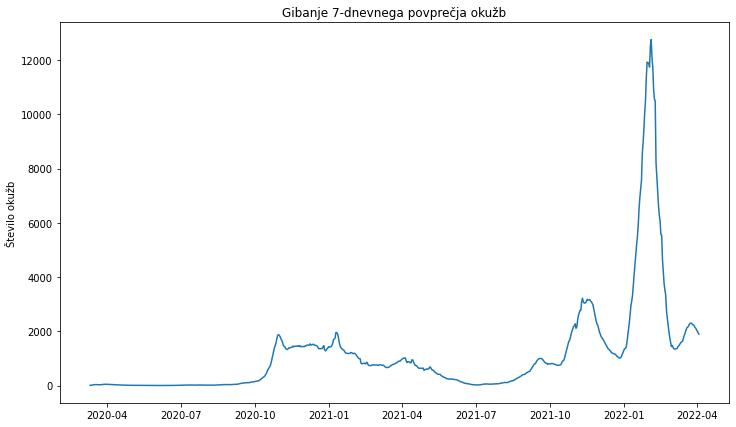

In [3]:
x1 = dates[7:]
y1 = weekly_inf_average
plt.figure(figsize=(12, 7))
plt.plot(x1, y1, label="line 1")
plt.ylabel('Število okužb')
plt.title('Gibanje 7-dnevnega povprečja okužb')
plt.show()

Zanimalo nas je kako se je precepljenost spreminjala od začetka ceplenja.
Za to smo naredili graf ki nam prikazuje precepljenost prebivalstva slovenije.

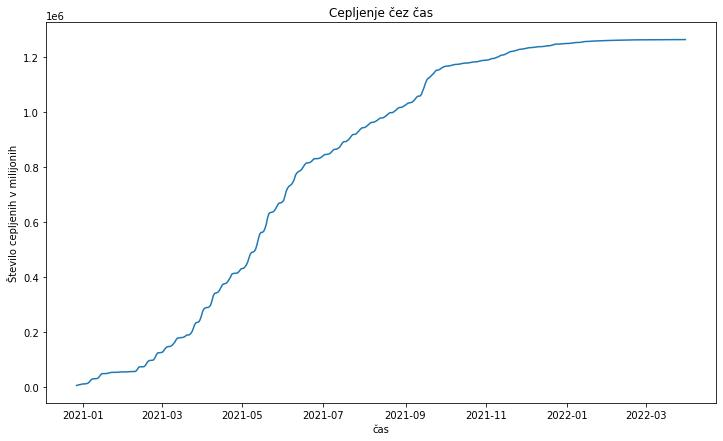

In [4]:
x1 = vaccine_total.keys()
y1 = vaccine_total.values()
plt.figure(figsize=(12, 7))
plt.plot(x1, y1, label="line 1")
plt.xlabel('čas')
plt.ylabel('Število cepljenih v milijonih')
plt.title('Cepljenje čez čas')
plt.show()


Naredili smo še graf da ugotovimo razliko med hospitaliziranimi ki so bili cepljeni in ki niso bili cepljeni.
Zato da bi ugotovili kakšno razliko je naredilo cepivo.


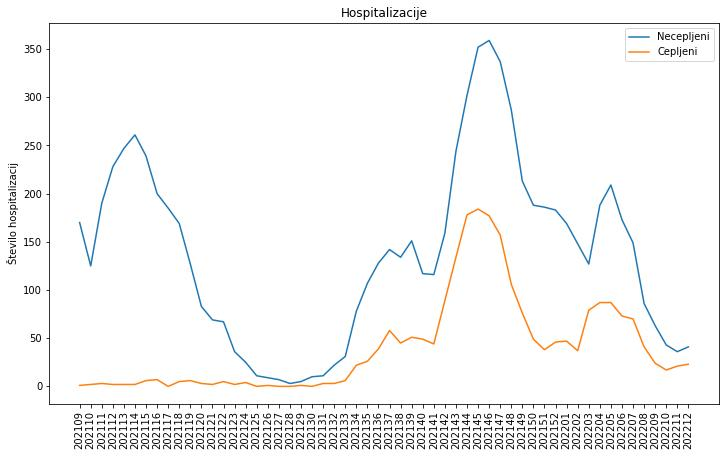

In [5]:
x1 = np.arange(0, len(hospitalised_unvaccinated.values()), 1)
x1 = hospitalised_unvaccinated.keys()
y1 = hospitalised_unvaccinated.values()
plt.figure(figsize=(12, 7))
plt.plot(x1, y1, label="Necepljeni")
x2 = hospitalised_vaccinated.keys()
y2 = hospitalised_vaccinated.values()
plt.xticks(list(hospitalised_vaccinated.keys()))
plt.gca().set_xticklabels(list(hospitalised_vaccinated.keys()), rotation=90)
plt.plot(x2, y2, label="Cepljeni")
plt.legend(loc=1)
plt.ylabel('Število hospitalizacij')
plt.title('Hospitalizacije')
plt.show()

Zanimalo nas je ali na okužbe uplivajo tudi letni časi.
Za prikaz števila okužb v letnem času smo naredili naslednji graf.

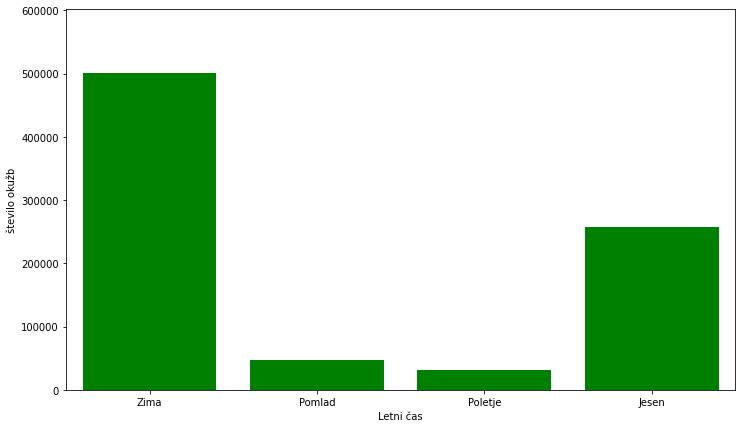

In [6]:
plt.figure(figsize=(12, 7))
plt.ylim(0, max(seasons)+100000)
plt.xlim(-0.5, len(seasons)-0.5)
plt.bar(season_names, seasons, color='g')
plt.xticks(season_names)
plt.gca().set_xticklabels(list(season_names))
plt.xlabel("Letni čas")
plt.ylabel("število okužb")
plt.show()

Primerjava primorske in gorenjske regije.
v naslednjih dveh grafih prikažemo število okuženih v regiji za vsak dan in temperatura za vsak dan.
S tem grafom smo poskušali ugotoviti ali je število okužb odvisno od temperature in ali je v toplejsem kraju manj okužb.

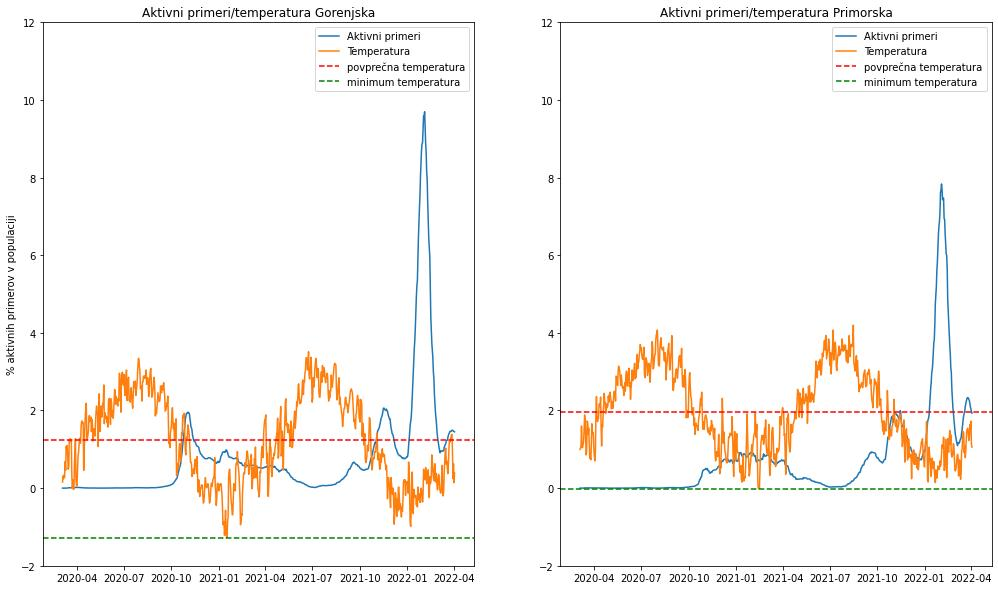

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(17, 10))
x1 = active_infections_regions.keys()
y1 = active_GORENJSKA
x2 = active_infections_regions.keys()
y2 = temp_GORENJSKA
axes[0].set_ylim([-2,12])
axes[0].plot(x1, y1, label="Aktivni primeri")
axes[0].plot(x2, y2, label="Temperatura")
axes[0].axhline(np.array(temp_GORENJSKA).mean(), color='r', linestyle='--', label="povprečna temperatura")
axes[0].axhline(np.array(temp_GORENJSKA).min(), color='green', linestyle='--', label="minimum temperatura")
axes[0].set_ylabel('% aktivnih primerov v populaciji')
axes[0].set_title('Aktivni primeri/temperatura Gorenjska')
axes[0].legend(loc=0)
x1 = active_infections_regions.keys()
y1 = active_PRIMORSKA
x2 = active_infections_regions.keys()
y2 = temp_PRIMORSKA
axes[1].set_ylim([-2,12])
axes[1].plot(x1, y1, label="Aktivni primeri")
axes[1].plot(x2, y2, label="Temperatura")
axes[1].axhline(np.array(temp_PRIMORSKA).mean(), color='r', linestyle='--', label="povprečna temperatura")
axes[1].axhline(np.array(temp_PRIMORSKA).min(), color='green', linestyle='--', label="minimum temperatura")
axes[1].set_title('Aktivni primeri/temperatura Primorska')
axes[1].legend(loc=0)
plt.show()


Glede na prejšne grafe smo opazili da je število okužb zelo verjetno korelirano z temperaturo.
Zato smo izračunali pearsonov koificient.ki smo ga dobili -0.4642 
Ugotovili smo da obstaja precej močna korelacija med tema atributoma.
Za boljšo predstavo pa smo naredili tudi graf ki nam prikaže da kadar so temperature nižje je odsototek okuženih veliko višji.
Ko pa so bile temperature višje  pa vidimo da je procent okuženih konstantno nizek.

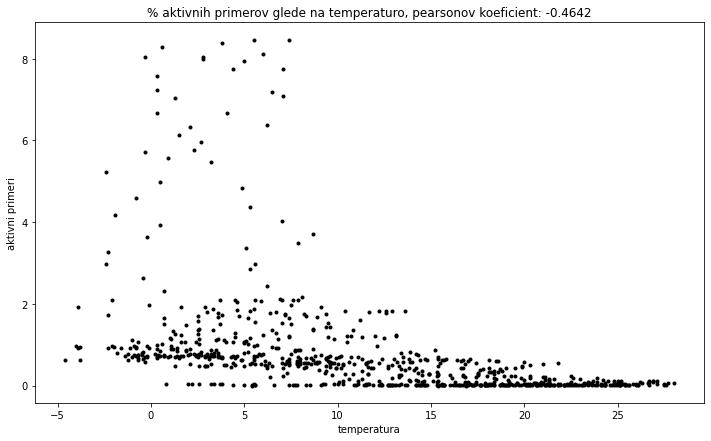

In [8]:
x = temp_LJ_N
y = active_LJ
plt.figure(figsize=(12, 7))
plt.plot(x, y, "k.")
plt.title("% aktivnih primerov glede na temperaturo, pearsonov koeficient: " + str((pearson_coefficient/len(actives)).__round__(4)))
plt.xlabel('temperatura')
plt.ylabel('aktivni primeri')
plt.show()

Zanimalo nas je tudi kakšna je bila razlika smrti glede na val. 
Ugotovili smo da je prvi val bil daleč najhujši saj je kljub nižjemu številu okuženih (v primerjavi za naslednjima valoma) bilo veliko več mrtvih nad 65 letom starosti.

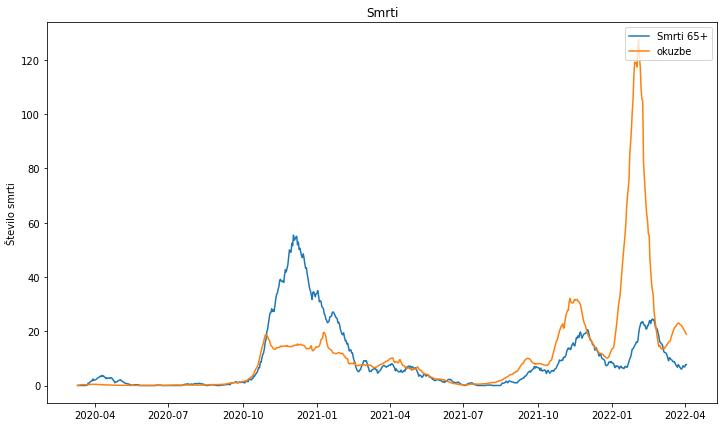

In [9]:
x1 = list(deaths_old.keys())[7:]
y1 = weekly_death_average
plt.figure(figsize=(12, 7))
plt.plot(x1, y1, label="Smrti 65+")
x2= dates[7:]
y2 = weekly_inf_normalized
plt.plot(x2, y2, label="okuzbe")
plt.legend(loc=1)
plt.ylabel('Število smrti')
plt.title('Smrti')
plt.show()

Zanimalo nas je kakšna razlika je v smrtih med tremi starostnimi skupinami ki smo ih določili 0-34, 35-64 in 65 dalje.
ugozovili smo da je razlika ogromna med skupinami.
Naslednji graf prikazuje razliko v smrtih med starostnimi skupinami.

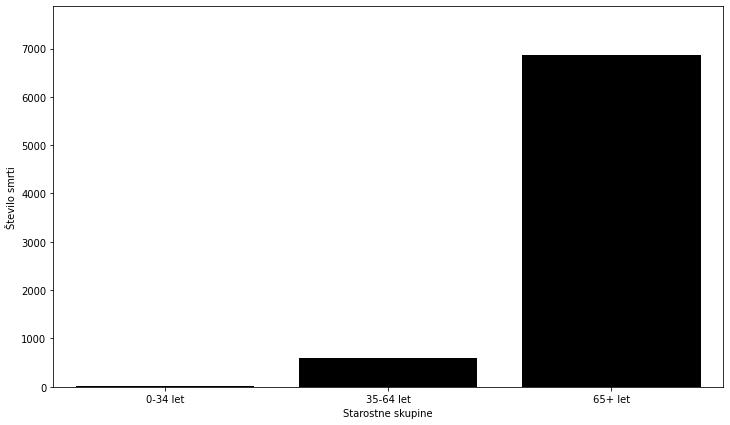

In [10]:
deaths = [sum(deaths_young.values()),sum(deaths_mid.values()),sum(deaths_old.values())]
age_groups = ["0-34 let", "35-64 let", "65+ let"]
plt.figure(figsize=(12, 7))
plt.ylim(0, max(deaths)+1000)
plt.xlim(-0.5, len(age_groups)-0.5)
plt.bar(age_groups, deaths, color='black')
plt.xticks(age_groups)
plt.gca().set_xticklabels(list(age_groups))
plt.xlabel("Starostne skupine")
plt.ylabel("Število smrti")
plt.show()

Zaključek